## 1. Packages

In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import src.upload_utils as ut
import constants as const
import src.draw_utils as du
import src.upload_yolo_utils as yu
import src.yolo_utils as yolo_utils

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## 2. Data

### 2.1 Load data from GoogleDrive and unzip

In [3]:
# ut.download_file_from_google_drive(id=const.FILE_ID, 
#                                    destination=const.DATA_ZIP)

In [4]:
# ut.unzip_data(zip_file=const.DATA_ZIP)

### 2.2. Load data

In [5]:
mri_df_raw = ut.load_data(from_dir=const.PATH_FILES)

[{upload_utils.py:30} INFO - Load from /Users/valeriakaravaeva/Documents/git/_LK/MRI_yolo/data/descr/ 12 files
[{upload_utils.py:35} INFO - Concat list of data frames
[{upload_utils.py:39} INFO - Finish read df = (916, 20)


### 2.3. Data exploration

In [6]:
mri_df_raw.head()

,ID,Исследователь,Кейс,Файлы,Протокол,XML,Файлы разметки,На срезе визуализируются межпозвоночные диски,Шейный межпозвоночный диск - здоровый,Шейный межпозвоночный диск - с подозрением на патологию,Шейный межпозвоночный диск - патологический,грудной межпозвоночный диск - здоровый,грудной межпозвоночный диск - с подозрением на паталогию,грудной межпозвоночный диск - патологический,поясничный межпозвоночный диск - здоровый,поясничный межпозвоночный диск - с подозрением на патологию,поясничный межпозвоночный диск - патологический,крестцовый межпозвоночный диск - здоровый,крестцовый межпозвоночный диск - с подозрением на патологию,крестцовый межпозвоночный диск - патологический
0,2872,Denis Shpak,4773 - dcm-dromanov,img_00215.jpg/n,MRI_NECK_SAG_prot_hern,<annotation>\r\n <filename>https://...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3144,Denis Shpak,4774 - dcm-dromanov,img_00226.jpg/n,MRI_NECK_SAG_prot_hern,<annotation>\r\n <filename>https://...,NaN,Визуализируются (можно размечать),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5571,Denis Shpak,4791 - dcm-dromanov,img_00200.jpg/n,MRI_NECK_SAG_prot_hern,NaN,NaN,Визуализируются (можно размечать),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5572,Denis Shpak,4791 - dcm-dromanov,img_00200.jpg/n,MRI_NECK_SAG_prot_hern,NaN,NaN,Визуализируются (можно размечать),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5573,Denis Shpak,4791 - dcm-dromanov,img_00200.jpg/n,MRI_NECK_SAG_prot_hern,NaN,NaN,Визуализируются (можно размечать),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
mri_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 20 columns):
ID                                                             916 non-null int64
Исследователь                                                  916 non-null object
Кейс                                                           916 non-null object
Файлы                                                          916 non-null object
Протокол                                                       916 non-null object
XML                                                            892 non-null object
Файлы разметки                                                 0 non-null float64
На срезе визуализируются межпозвоночные диски                  896 non-null object
Шейный межпозвоночный диск - здоровый                          0 non-null float64
Шейный межпозвоночный диск - с подозрением на патологию        0 non-null float64
Шейный межпозвоночный диск - патологический                    0 non-

In [8]:
mri_df_raw['На срезе визуализируются межпозвоночные диски'].value_counts()

Не визуализируются (срез не пригоден для разметки)    531
Визуализируются (можно размечать)                     365
Name: На срезе визуализируются межпозвоночные диски, dtype: int64

In [9]:
mri_df_raw = mri_df_raw[mri_df_raw['На срезе визуализируются межпозвоночные диски'] == 'Визуализируются (можно размечать)']

#### We can see columns with trash (all rows is null) and columns which we need to delete. Let's start data preprocessing (include XML parsing)

In [10]:
mri_preproc = ut.parse_xml(df=mri_df_raw)
mri_preproc.head()

[{upload_utils.py:79} INFO - Start preprocessing data, shape = (365, 20)
[{upload_utils.py:80} INFO - Drop NaN columns of XML
[{upload_utils.py:85} INFO - Start parse XML, shape = (356, 20)


,name,deleted,verified,occluded,parts,date,id,file,imagesize,x,y,x_center,y_center,width,height
0,shejnyj-mezhpozvonochnyj-disk-zdorovyj,0,0,no,"0 {'hasparts': None, 'ispartof': None}\n1 ...",28-Aug-2018 10:10:28,3144,img_00226.jpg,"384, 384",172,107,186.5,113.0,29,12
1,shejnyj-mezhpozvonochnyj-disk-zdorovyj,0,0,no,"0 {'hasparts': None, 'ispartof': None}\n1 ...",28-Aug-2018 10:10:35,3144,img_00226.jpg,"384, 384",168,132,180.5,138.0,25,12
2,shejnyj-mezhpozvonochnyj-disk-zdorovyj,0,0,no,"0 {'hasparts': None, 'ispartof': None}\n1 ...",28-Aug-2018 10:10:41,3144,img_00226.jpg,"384, 384",164,156,176.0,162.0,24,12
3,shejnyj-mezhpozvonochnyj-disk-patologicheskij,0,0,no,"0 {'hasparts': None, 'ispartof': None}\n1 ...",28-Aug-2018 10:27:23,3144,img_00226.jpg,"384, 384",164,178,176.5,186.0,25,16
4,shejnyj-mezhpozvonochnyj-disk-zdorovyj,0,0,no,"0 {'hasparts': None, 'ispartof': None}\n1 ...",28-Aug-2018 10:27:41,3144,img_00226.jpg,"384, 384",165,203,178.5,212.5,27,19


#### We can see a lot of columns. But we can drop a few columns because they don't contain information.
We should research: `imagesize`, `name`, `verified`, `occluded`, `deleted`, `date`

In [11]:
mri_preproc.id = mri_preproc.id.astype(object)

In [12]:
mri_preproc.describe(include=np.object)

,name,deleted,verified,occluded,parts,date,id,file,imagesize
count,2694,2694,2694,2694,2694,1577,2694,2694,2694
unique,8,2,1,1,12,1577,356,356,2
top,shejnyj-mezhpozvonochnyj-disk-zdorovyj,0,0,no,"0 {'hasparts': None, 'ispartof': None}\n1 ...",17-Sep-2018 11:26:52,3928,img_00370.jpg,"384, 384"
freq,961,2676,2694,2694,700,1,13,13,2675


Let's see how much class in `deleted` and `imagesize`. Can we leave only one class? (We can see below, that yes)

We can see that `verified`, `occluded`, `parts`, `date` are not information. 

Function `preproc_data(df)` filters our data:
* **deleted** = 0
* **imagesize** = 384, 384
* **type_mri** = shejnyj

In [13]:
mri_filter, cat_label = ut.preproc_data(df=mri_preproc, 
                                        columns_out=const.COLUMNS, 
                                        type_disk=const.TYPE_DISK)
mri_filter.head()

[{upload_utils.py:154} INFO - Adding column type_mri
[{upload_utils.py:157} INFO - Stats by type_mri {'shejnyj': 1702, 'grudnoj': 990, 'hernia': 1, 'protrusion': 1}
[{upload_utils.py:158} INFO - Stats by deleted {'0': 2676, '1': 18}
[{upload_utils.py:159} INFO - Stats by imagesize {'384, 384': 2675, '512, 512': 19}
[{upload_utils.py:161} INFO - Filtering data, shape before = (2694, 16)
[{upload_utils.py:166} INFO - Adding column type of disk
[{upload_utils.py:170} INFO - Adding column label (category)
[{upload_utils.py:175} INFO - Filtering data, shape before = (1665, 18)
[{upload_utils.py:176} INFO - Category {0: 'healthy', 1: 'patalogical', 2: 'suspicion'}
[{upload_utils.py:177} INFO - Filter by columns: id, label, file, type_disk, height, width, x, y, x_center, y_center


,id,label,file,type_disk,height,width,x,y,x_center,y_center
0,3144,0,img_00226.jpg,healthy,12,29,172,107,186.5,113.0
1,3144,0,img_00226.jpg,healthy,12,25,168,132,180.5,138.0
2,3144,0,img_00226.jpg,healthy,12,24,164,156,176.0,162.0
3,3144,1,img_00226.jpg,patalogical,16,25,164,178,176.5,186.0
4,3144,0,img_00226.jpg,healthy,19,27,165,203,178.5,212.5


### 2.4. Stats by clean data

In [14]:
mri_filter.describe(include=np.object)

,id,label,file,type_disk
count,1665,1665,1665,1665
unique,339,3,339,3
top,5590,0,img_00200.jpg,healthy
freq,8,935,8,935


In [15]:
mri_filter.describe()

,height,width,x,y,x_center,y_center
count,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000
mean,19.799399,37.666667,159.067267,162.058258,177.900601,171.957958
std,4.242995,6.972301,21.081807,42.243679,20.562241,42.514640
min,9.000000,19.000000,106.000000,57.000000,124.500000,69.000000
25%,17.000000,33.000000,144.000000,131.000000,163.500000,140.000000
50%,19.000000,38.000000,159.000000,163.000000,177.000000,172.500000
75%,22.000000,42.000000,173.000000,193.000000,192.500000,203.500000
max,51.000000,70.000000,214.000000,345.000000,229.500000,356.000000


Distribution of out class:

In [16]:
mri_filter['type_disk'].value_counts()

healthy        935
patalogical    400
suspicion      330
Name: type_disk, dtype: int64

Good!

## 3. Draw

In [36]:
mri_preproc[mri_preproc['file'] == 'img_00020.jpg']

,name,deleted,verified,occluded,parts,date,id,file,imagesize,x,y,x_center,y_center,width,height,type_mri
468,shejnyj-mezhpozvonochnyj-disk-patologicheskij,0,0,no,"0 {'hasparts': None, 'ispartof': None}\n1 ...",18-Sep-2018 17:59:18,5111,img_00020.jpg,"384, 384",137,145,151.0,153.5,28,17,shejnyj
469,shejnyj-mezhpozvonochnyj-disk-patologicheskij,0,0,no,"0 {'hasparts': None, 'ispartof': None}\n1 ...",18-Sep-2018 17:59:22,5111,img_00020.jpg,"384, 384",134,171,148.5,178.5,29,15,shejnyj
470,shejnyj-mezhpozvonochnyj-disk-patologicheskij,0,0,no,"0 {'hasparts': None, 'ispartof': None}\n1 ...",18-Sep-2018 17:59:26,5111,img_00020.jpg,"384, 384",132,192,147.5,201.5,31,19,shejnyj


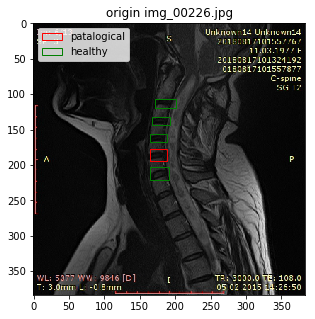

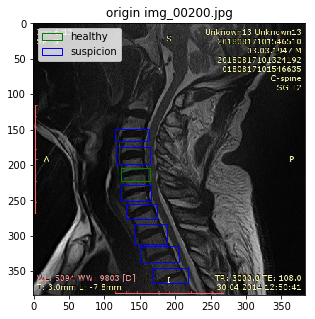

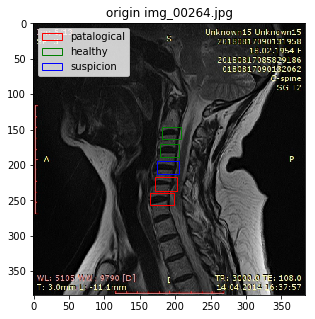

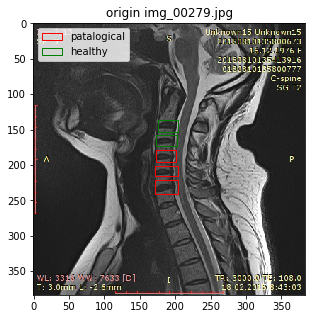

In [17]:
for img in mri_filter['file'].unique()[0:4]:
    plots = du.draw_img(df=[mri_filter], 
                        img_name=img,
                        types_df=['origin'],
                        dir_img=const.PATH_IMG, 
                        color_patch=const.COLORS, 
                        figsize=(5, 5))

In [18]:
unique_files = mri_filter['file'].unique()

In [19]:
N = len(unique_files)
TEST_NUM = int(0.3*N)

## 4. Prepare data for yolo

### 4.1. Copy obj.names and obj.data to data/

In [20]:
yu.copy_files(dir_from=const.ROOT + '/cfg/',
              dir_to=const.PATH_DARKNET + 'data/',
              files=['obj.names', 'obj.data'])

[{upload_yolo_utils.py:28} INFO - Copy from /Users/valeriakaravaeva/Documents/git/_LK/MRI_yolo/cfg/ 
 to 
 /Users/valeriakaravaeva/Documents/git/_LK/MRI_yolo/darknet/build/darknet/x64/data/
[{upload_yolo_utils.py:34} INFO - Success copy 2 files


### 4.2. Copy cfg yolo.cfg to cfg/

In [26]:
yu.copy_files(dir_from=const.ROOT + '/cfg/',
              dir_to=const.PATH_DARKNET + 'cfg/',
              files=['yolo.cfg'])

[{upload_yolo_utils.py:28} INFO - Copy from /Users/valeriakaravaeva/Documents/git/_LK/MRI_yolo/cfg/ 
 to 
 /Users/valeriakaravaeva/Documents/git/_LK/MRI_yolo/darknet/build/darknet/x64/cfg/
[{upload_yolo_utils.py:34} INFO - Success copy 1 files


### 4.3. Copy all images to data/obj (and create obj/ dir)

In [28]:
if not os.path.exists(const.PATH_DARKNET + 'data/obj'):
    os.makedirs(const.PATH_DARKNET + 'data/obj')

In [29]:
yu.copy_files(dir_from=const.PATH_IMG,
              dir_to=const.PATH_DARKNET + 'data/obj',
              files=unique_files)

[{upload_yolo_utils.py:28} INFO - Copy from /Users/valeriakaravaeva/Documents/git/_LK/MRI_yolo/data/images/ 
 to 
 /Users/valeriakaravaeva/Documents/git/_LK/MRI_yolo/darknet/build/darknet/x64/data/obj
[{upload_yolo_utils.py:34} INFO - Success copy 339 files


### 4.4. Create for each images txt file with polygon (to data/obj)

In [30]:
yu.img_txt(df=mri_filter,
           dir_to=const.PATH_DARKNET + 'data/obj', 
           img_size=const.IMG_SIZE,
           columns_yolo=const.COLUMNS_YOLO,
           imgs=unique_files)

[{upload_yolo_utils.py:40} INFO - Create txt file to dir 
 /Users/valeriakaravaeva/Documents/git/_LK/MRI_yolo/darknet/build/darknet/x64/data/obj
[{upload_yolo_utils.py:48} INFO - Success create 339 files txt


### 4.5. Copy create test and train images and save to data/

In [21]:
test_set, train_set = yu.test_train_files(imgs=unique_files, 
                                          test_size=TEST_NUM, 
                                          dir_to_file='data/obj/',
                                          dir_to=const.PATH_DARKNET + 'data/')

[{upload_yolo_utils.py:61} INFO - Write test file 101 to 
 /Users/valeriakaravaeva/Documents/git/_LK/MRI_yolo/darknet/build/darknet/x64/data/
[{upload_yolo_utils.py:67} INFO - Write train file 238 to 
 /Users/valeriakaravaeva/Documents/git/_LK/MRI_yolo/darknet/build/darknet/x64/data/


## 5. Evaluate

### 5.1. Change directory

In [22]:
import os
os.chdir(const.PATH_DARKNET)

### 5.2. Load network (cfg, data, weight)

In [23]:
net, meta = yolo_utils.load_data(cfg=const.CFG_YOLO, 
                                 data=const.DATA_YOLO, 
                                 weights=const.WEIGHT_YOLO.format('final'))

[{yolo_utils.py:185} INFO - Encode to ascii
[{yolo_utils.py:190} INFO - Load net b'/Users/valeriakaravaeva/Documents/git/_LK/MRI_yolo/darknet/build/darknet/x64/cfg/yolo.cfg' b'/Users/valeriakaravaeva/Documents/git/_LK/MRI_yolo/darknet/build/darknet/x64/backup/yolo_final.weights'
[{yolo_utils.py:193} INFO - Load meta b'/Users/valeriakaravaeva/Documents/git/_LK/MRI_yolo/darknet/build/darknet/x64/data/obj.data'


### 5.3. Create DataFrame for predict

In [24]:
def detect_df(net, meta, img, columns, cat_label, threshold=.2):
    detect_list = yolo_utils.detect(net=net,
                         meta=meta,
                         image=('data/obj/' + img).encode('ascii'),
                         thresh=threshold)
    results = pd.DataFrame(detect_list)
    if results.shape[0] == 0:
        return pd.DataFrame(columns=columns)
    results = results.drop(1, axis=1)
    results.columns = columns
    results['x'] = results['x_center'] - results['width'] / 2
    results['y'] = results['y_center'] - results['height'] / 2
    results['label'] = results['label'].astype(int) - 1
    results['type_disk'] = results['label'].map(cat_label)
    results['file'] = img
    return results

In [25]:
cat_label

{0: 'healthy', 1: 'patalogical', 2: 'suspicion'}

In [26]:
yolo_results_test_list = []
for i in range(len(test_set)):
    results = detect_df(net=net, 
                               meta=meta,
                               img=test_set[i],
                               cat_label=cat_label, 
                               columns=const.COLUMNS_YOLO,
                               threshold=.2)
    yolo_results_test_list.append(results)
yolo_results_test = pd.concat(yolo_results_test_list)

In [27]:
yolo_results_test.head()

,label,x_center,y_center,width,height,x,y,type_disk,file
0,0,187.413559,172.155075,38.940491,21.883724,167.943314,161.213213,healthy,img_00111.jpg
1,1,189.267273,195.374969,37.406639,19.711788,170.563953,185.519075,patalogical,img_00111.jpg
2,2,183.250885,148.748230,31.571140,16.363811,167.465315,140.566324,suspicion,img_00111.jpg
0,0,188.130188,212.819122,45.271484,24.676285,165.494446,200.480980,healthy,img_00928.jpg
1,2,194.662857,105.442230,37.771755,15.459082,175.776979,97.712689,suspicion,img_00928.jpg


### 5.4. Visualize results

KeyError: ('healthy', 'occurred at index 0')

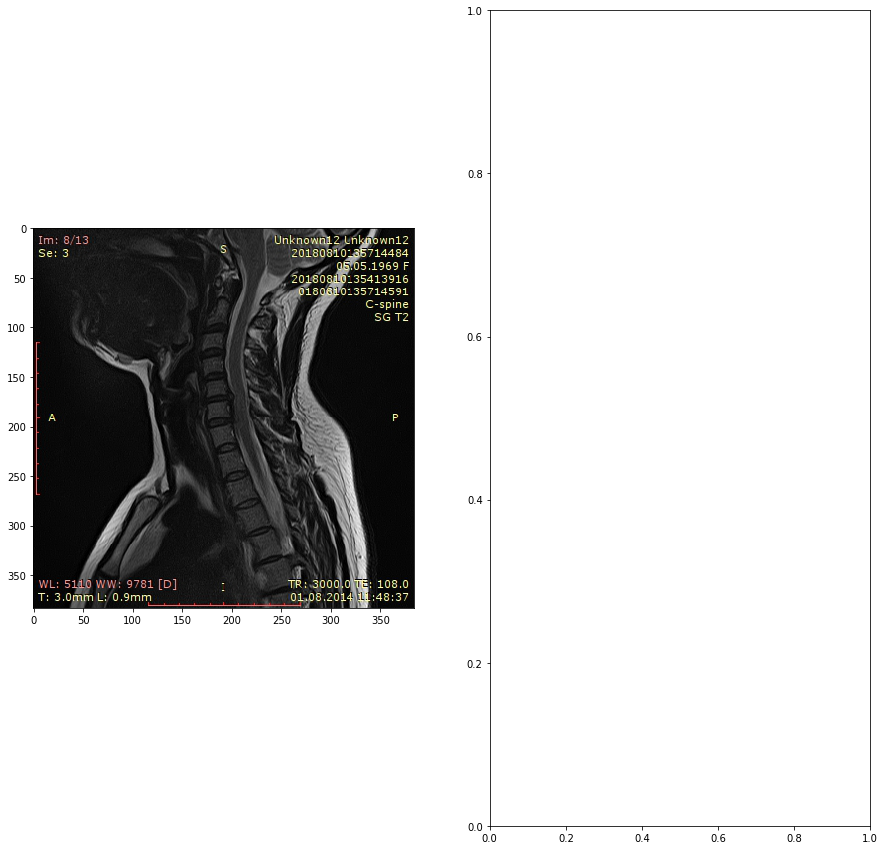

In [28]:
for i in test_set[0:10]:
    du.draw_img(df=[yolo_results_test, mri_filter], 
             types_df = ['predict', 'origin'],
             img_name=i, 
             dir_img=const.PATH_IMG, 
             figsize=(15, 15),
             color_patch={'0': 'r', '1': 'b', '2': 'g'})

In [98]:
def get_IoU(boxA, boxB):
    
    
    if boxA['type_disk'] != boxB['type_disk']: 
        return 0

    xA, yA, wA, hA = (boxA['x'], boxA['y'], boxA['width'], boxA['height'])
    xB, yB, wB, hB = (boxB['x'], boxB['y'], boxB['width'], boxB['height'])
    
#     tx = sign(xB - xA)
#     ty = sign(yB - yA)

#     Ix = (wA/2 + wB/2 + tx*(xA - xB))
#     Iy = (hA/2 + hB/2 + ty*(yA - yB))
    
    Ix = max(0, min(xA + wA, xB + wB) - max(xA, xB))
    Iy = max(0, min(yA + hA, yB + hB) - max(yA, yB))

    I = Ix*Iy
    
    U = wA*hA + wB*hB - I
    return I/U

In [143]:
img_pred = yolo_results_test[yolo_results_test['file'] == 'img_00059.jpg'].copy().reset_index()
img_origin = mri_filter[mri_filter['file'] == 'img_00059.jpg'].copy().reset_index()

In [144]:
img_pred

,index,file,height,label,type_disk,width,x,x_center,y,y_center
0,0,img_00059.jpg,22.318689,2,zdorovyj,30.515327,175.711086,190.968750,84.411838,95.571182
1,1,img_00059.jpg,19.694386,2,zdorovyj,33.027313,173.836868,190.350525,103.850477,113.697670
2,2,img_00059.jpg,17.981077,2,zdorovyj,31.458954,175.281250,191.010727,135.492417,144.482956
3,3,img_00059.jpg,17.172712,2,zdorovyj,35.102383,173.882311,191.433502,159.962777,168.549133
4,4,img_00059.jpg,20.359983,0,patologicheskij,37.664902,172.419151,191.251602,183.099580,193.279572


In [164]:
iou_list = []

img_origin_list = []

for img in ['img_00059.jpg']:
    img_pred = yolo_results_test[yolo_results_test['file'] == img].copy().reset_index()
    img_origin = mri_filter[mri_filter['file'] == img].copy().reset_index()
    img_origin['iou'] = 0.0
    for i in range(img_origin.shape[0]):
        iou = []
        for j in range(img_pred.shape[0]):
            iou.append(get_IoU(boxA=img_origin.iloc[i,:], 
                               boxB=img_pred.iloc[j,:]))
        img_origin['iou'][i] = max(iou)
    img_origin_list.append(img_origin)
    
mri_metrics = pd.concat(img_origin_list, axis=1)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [161]:
mri_metrics

,index,id,label,file,type_disk,height,width,x,y,x_center,y_center,iou
0,141,5110,2,img_00059.jpg,zdorovyj,18,25,182,87,194.5,96.0,0.627459
1,142,5110,2,img_00059.jpg,zdorovyj,17,24,181,113,193.0,121.5,0.314234
2,143,5110,2,img_00059.jpg,zdorovyj,13,25,181,139,193.5,145.5,0.574544
3,144,5110,0,img_00059.jpg,patologicheskij,18,30,179,160,194.0,169.0,0.000000
4,145,5110,0,img_00059.jpg,patologicheskij,16,32,176,184,192.0,192.0,0.667661


0    0.627459
1    0.314234
2    0.574544
3    0.000000
4    0.667661
Name: IoU, dtype: float64

In [142]:
img_origin

,index,id,label,file,type_disk,height,width,x,y,x_center,y_center,IoU
0,141,5110,2,img_00059.jpg,zdorovyj,18,25,182,87,194.5,96.0,0.0
1,142,5110,2,img_00059.jpg,zdorovyj,17,24,181,113,193.0,121.5,0.0
2,143,5110,2,img_00059.jpg,zdorovyj,13,25,181,139,193.5,145.5,0.0
3,144,5110,0,img_00059.jpg,patologicheskij,18,30,179,160,194.0,169.0,0.0
4,145,5110,0,img_00059.jpg,patologicheskij,16,32,176,184,192.0,192.0,0.0
